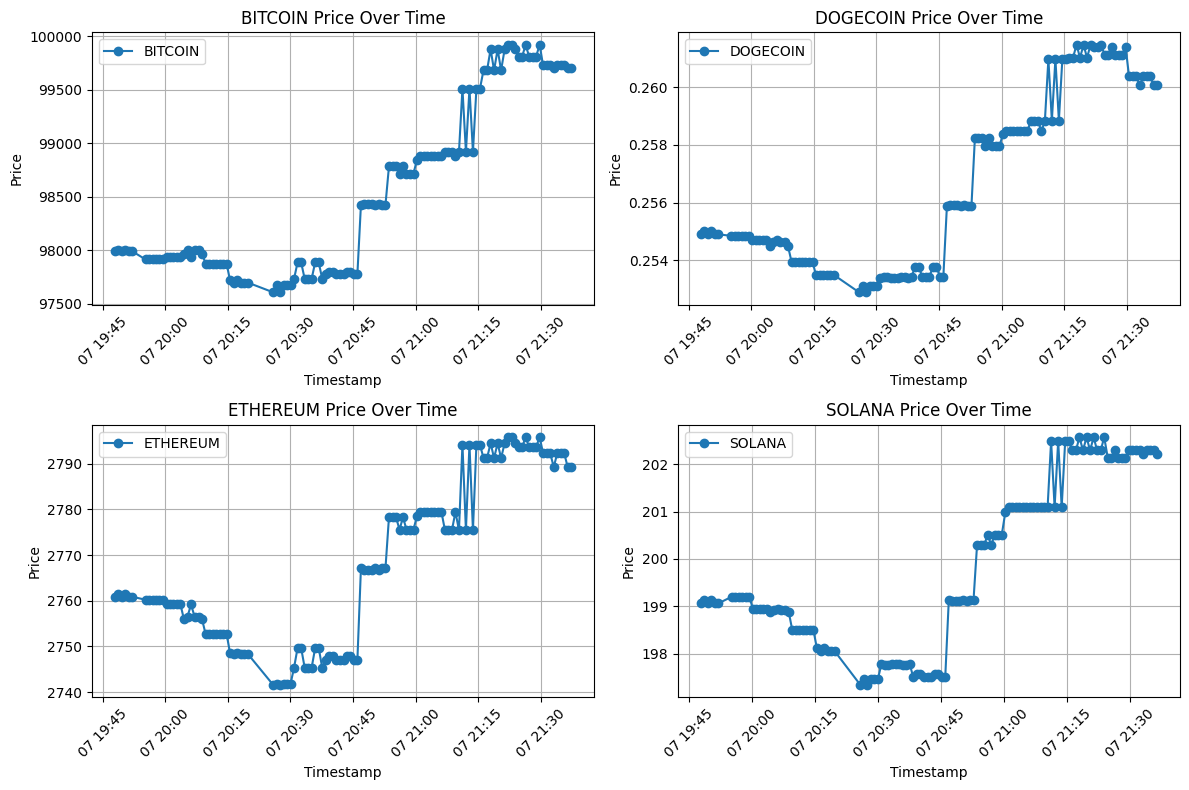

KeyboardInterrupt: 

In [2]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import time
from IPython.display import clear_output

# Đường dẫn database
SQLITE_DB = r"C:\MyProject\consumer\CryptoDB.db"

while True:
    # Kết nối SQLite và lấy dữ liệu
    conn = sqlite3.connect(SQLITE_DB)
    df = pd.read_sql("SELECT * FROM crypto_prices", conn)
    conn.close()

    # Chuyển timestamp thành datetime
    df["timestamp"] = pd.to_datetime(df["timestamp"])

    clear_output(wait=True)

    coins = [col for col in df.columns if col != "timestamp"][:4]

    # Tạo 4 biểu đồ riêng biệt
    fig, axes = plt.subplots(2, 2, figsize=(12, 8)) 
    axes = axes.flatten() 

    for i, coin in enumerate(coins):
        axes[i].plot(df["timestamp"], df[coin], marker="o", label=coin)
        axes[i].set_title(f"{coin} Price Over Time")
        axes[i].set_xlabel("Timestamp")
        axes[i].set_ylabel("Price")
        axes[i].legend()
        axes[i].grid()
        axes[i].tick_params(axis='x', rotation=45)

    plt.tight_layout()
    plt.show()

    # Dừng 60 giây trước khi cập nhật tiếp
    time.sleep(60)
